# Read Data

In [1]:
import pandas as pd

df = pd.read_csv('spotify_data.csv')
df

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450.0
2496,Social House - Magic In The Hamptons,505511969,118483.0
2497,KISS - Rock And Roll All Nite,505386377,205701.0
2498,Mora - 512,505309100,280336.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Songs & Artist  2500 non-null   object 
 1   Streams         2500 non-null   int64  
 2   Daily           2498 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 58.7+ KB


In [3]:
df.describe()

,Streams,Daily
count,2.500000e+03,2.498000e+03
mean,9.381437e+08,5.044663e+05
std,4.788772e+08,4.963328e+05
min,5.052491e+08,7.523000e+03
25%,6.099077e+08,2.245135e+05
50%,7.628053e+08,3.763570e+05
75%,1.096878e+09,6.318060e+05
max,4.463659e+09,7.553534e+06


# Data cleaning

In [4]:
df.isnull().sum()

Songs & Artist    0
Streams           0
Daily             2
dtype: int64

In [5]:
mean = df['Daily'].mean()
df['Daily'] = df['Daily'].fillna(mean)

In [6]:
df.isnull().sum()

Songs & Artist    0
Streams           0
Daily             0
dtype: int64

In [7]:
df['Daily'].astype(int)

0       1619447
1       1001507
2       1506961
3       1611374
4       1337404
         ...   
2495    1278450
2496     118483
2497     205701
2498     280336
2499     288515
Name: Daily, Length: 2500, dtype: int32

In [8]:
df.isnull().sum()

Songs & Artist    0
Streams           0
Daily             0
dtype: int64

In [9]:
#Columns Streams
stream = df['Streams'].duplicated().sum()
display(stream)

#Columns daily
daily = df['Daily'].duplicated().sum()
display(daily)

#Columns Songs & Artist
song = df['Songs & Artist'].duplicated().sum()
display(song)

2

5

26

In [10]:
df_duplicate = df.duplicated().sum()

df_unique = df.nunique()

print("Jumlah duplikat yang ditemukan dalam data :", df_duplicate, "\n")
print(df_unique)

Jumlah duplikat yang ditemukan dalam data : 0 

Songs & Artist    2474
Streams           2498
Daily             2495
dtype: int64


# Data analysis

In [11]:
korelasi = df[['Daily', 'Streams']].corr()
korelasi

,Daily,Streams
Daily,1.000000,0.443101
Streams,0.443101,1.000000


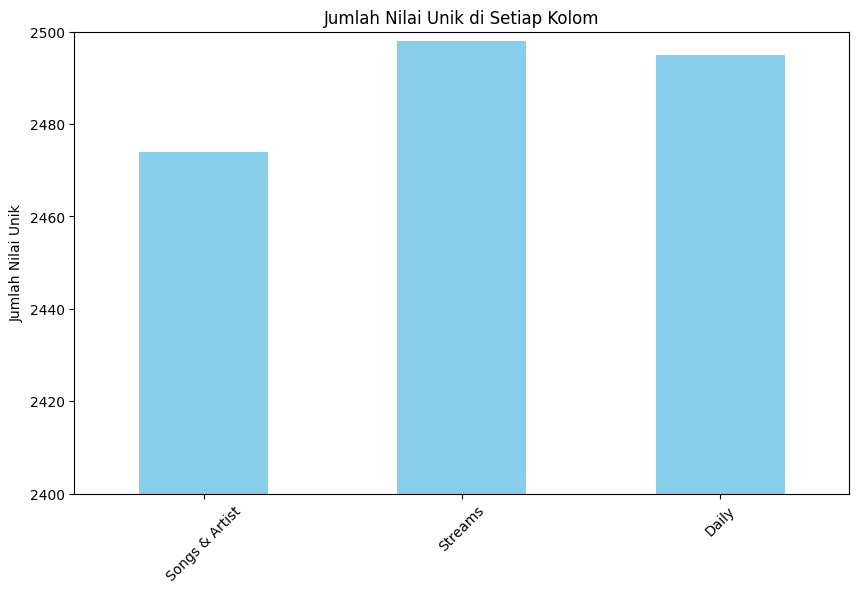

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
df_unique.plot(kind='bar', color='skyblue')
plt.title("Jumlah Nilai Unik di Setiap Kolom")
plt.ylabel("Jumlah Nilai Unik")
plt.ylim(2400, 2500)
plt.xticks(rotation=45)
plt.show()

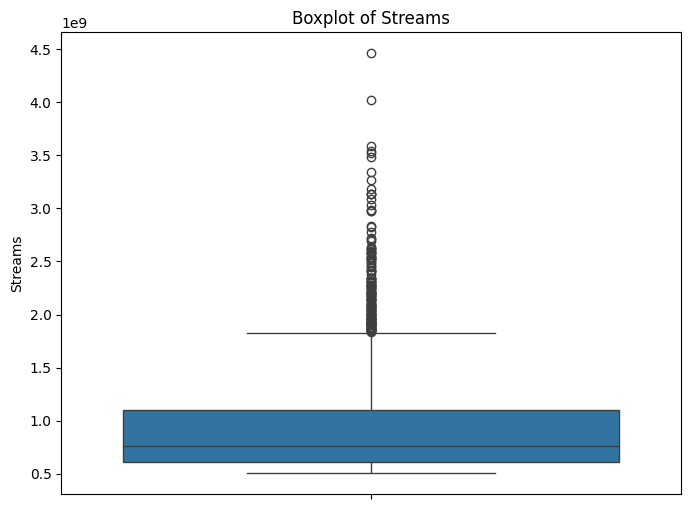

In [13]:
# Create a boxplot for the 'Streams' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Streams')
plt.title('Boxplot of Streams')
plt.show()


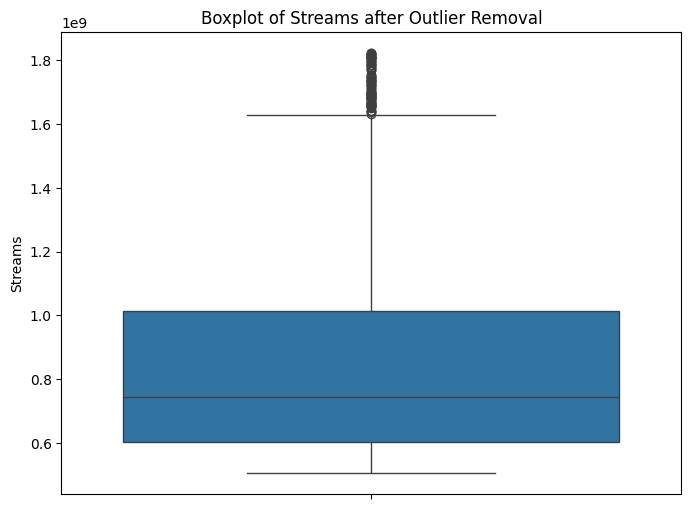

In [14]:
# Calculate the IQR and define the lower and upper bounds for outlier detection
Q1 = df['Streams'].quantile(0.25)
Q3 = df['Streams'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df[(df['Streams'] >= lower_bound) & (df['Streams'] <= upper_bound)]

# Create a boxplot again after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, y='Streams')
plt.title('Boxplot of Streams after Outlier Removal')
plt.show()

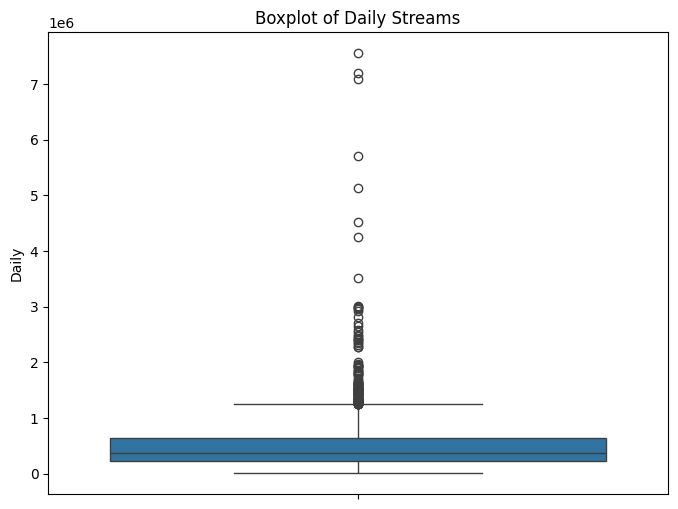

In [15]:
# Create a boxplot for the 'Daily' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Daily')
plt.title('Boxplot of Daily Streams')
plt.show()


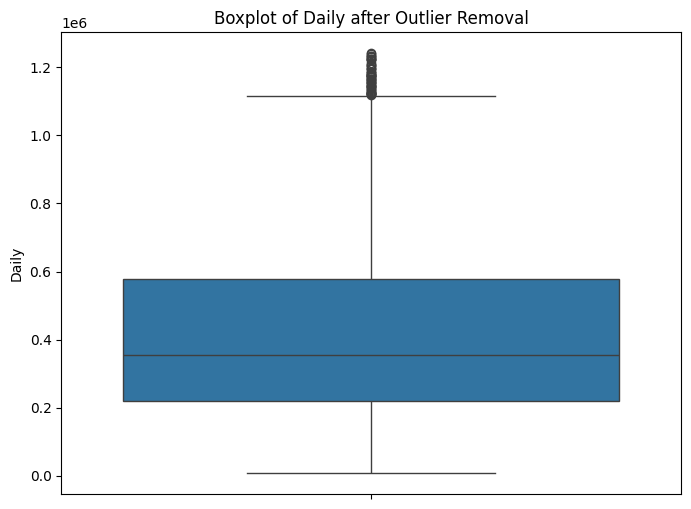

In [16]:
# Calculate the IQR and define the lower and upper bounds for outlier detection
Q1 = df['Daily'].quantile(0.25)
Q3 = df['Daily'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df[(df['Daily'] >= lower_bound) & (df['Daily'] <= upper_bound)]

# Create a boxplot again after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, y='Daily')
plt.title('Boxplot of Daily after Outlier Removal')
plt.show()

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

data =pd.read_csv('spotify_data.csv')
data 

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450.0
2496,Social House - Magic In The Hamptons,505511969,118483.0
2497,KISS - Rock And Roll All Nite,505386377,205701.0
2498,Mora - 512,505309100,280336.0


In [19]:
print(f"Data tersebut memeiliki frekuensi sebanyak {len(data)}\n")
kolom=data.columns.to_list()
for y in kolom:
    if data[y].dtype == 'O':
        continue
    print(f'Dari kolom {y} nilai mean (rata-rata)',(data[y].mean()))
    print(f'Dari kolom {y} nilai median nya',(data[y].median()))
    print(f'Dari kolom {y} nilai modus nya',(data[y].mode()[0]))
    print(f'Dari kolom {y} nilai varians nya',(data[y].std(ddof=1)))
    print(f'Dari kolom {y} nilai standar deviasi nya',(data[y].var(ddof=1)),'\n')

Data tersebut memeiliki frekuensi sebanyak 2500

Dari kolom Streams nilai mean (rata-rata) 938143684.006
Dari kolom Streams nilai median nya 762805257.0
Dari kolom Streams nilai modus nya 522093532
Dari kolom Streams nilai varians nya 478877169.5564695
Dari kolom Streams nilai standar deviasi nya 2.293233435224156e+17 

Dari kolom Daily nilai mean (rata-rata) 504466.3298638911
Dari kolom Daily nilai median nya 376357.0
Dari kolom Daily nilai modus nya 200584.0
Dari kolom Daily nilai varians nya 496332.8267554446
Dari kolom Daily nilai standar deviasi nya 246346274915.05017 



In [20]:
for i in kolom:
    if data[i].dtype == 'O':
        continue
    data[f'z_score {i}'] = stats.zscore(data[i])
    outliers_zscore = data[data[f'z_score {i}'].abs() > 3]
    display(f'Outlier z-score dari {i}',outliers_zscore)

'Outlier z-score dari Streams'

,Songs & Artist,Streams,Daily,z_score Streams
0,The Weeknd - Blinding Lights,4463658617,1619447.0,7.363517
1,Ed Sheeran - Shape of You,4018102402,1001507.0,6.432912
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0,5.535992
3,Harry Styles - As It Was,3544187311,1611374.0,5.443076
4,Post Malone - Sunflower,3518744128,1337404.0,5.389935
5,The Weeknd - Starboy,3481137472,1897939.0,5.311388
6,Drake - One Dance,3343221259,1329534.0,5.023331
7,The Kid LAROI - STAY,3266446596,1336615.0,4.862977
8,The Neighbourhood - Sweater Weather,3187169593,2976255.0,4.697396
9,Imagine Dragons - Believer,3140449933,1261166.0,4.599816


'Outlier z-score dari Daily'

,Songs & Artist,Streams,Daily,z_score Streams,z_score Daily


In [21]:
for i in kolom:
    if data[i].dtype == 'O':
        continue
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
    print(f'Lower bound {lower_bound} dan upper bound {upper_bound} di kolom {i}')
    display(f'Outlier dengan iqr di kolom {i}',outliers_iqr)

Lower bound -120548177.75 dan upper bound 1827334148.25 di kolom Streams


'Outlier dengan iqr di kolom Streams'

,Songs & Artist,Streams,Daily,z_score Streams,z_score Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0,7.363517,NaN
1,Ed Sheeran - Shape of You,4018102402,1001507.0,6.432912,NaN
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0,5.535992,NaN
3,Harry Styles - As It Was,3544187311,1611374.0,5.443076,NaN
4,Post Malone - Sunflower,3518744128,1337404.0,5.389935,NaN
...,...,...,...,...,...
142,Calvin Harris - This Is What You Came For,1852484716,586916.0,1.909726,NaN
143,Twenty One Pilots - Heathens,1851495827,493777.0,1.907660,NaN
144,Gotye - Somebody That I Used To Know,1846980747,908160.0,1.898230,NaN
145,5 Seconds of Summer - Youngblood,1844385350,463511.0,1.892809,NaN


Lower bound -386425.25 dan upper bound 1242744.75 di kolom Daily


'Outlier dengan iqr di kolom Daily'

,Songs & Artist,Streams,Daily,z_score Streams,z_score Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0,7.363517,NaN
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0,5.535992,NaN
3,Harry Styles - As It Was,3544187311,1611374.0,5.443076,NaN
4,Post Malone - Sunflower,3518744128,1337404.0,5.389935,NaN
5,The Weeknd - Starboy,3481137472,1897939.0,5.311388,NaN
...,...,...,...,...,...
1911,Jimin - Who,603979423,7553534.0,-0.697947,NaN
2266,Dasha - Austin (Boots Stop Workin'),539275304,2404759.0,-0.833091,NaN
2325,SZA - Saturn,530318242,1465477.0,-0.851799,NaN
2448,Billie Eilish - LUNCH,512632106,1568261.0,-0.888739,NaN


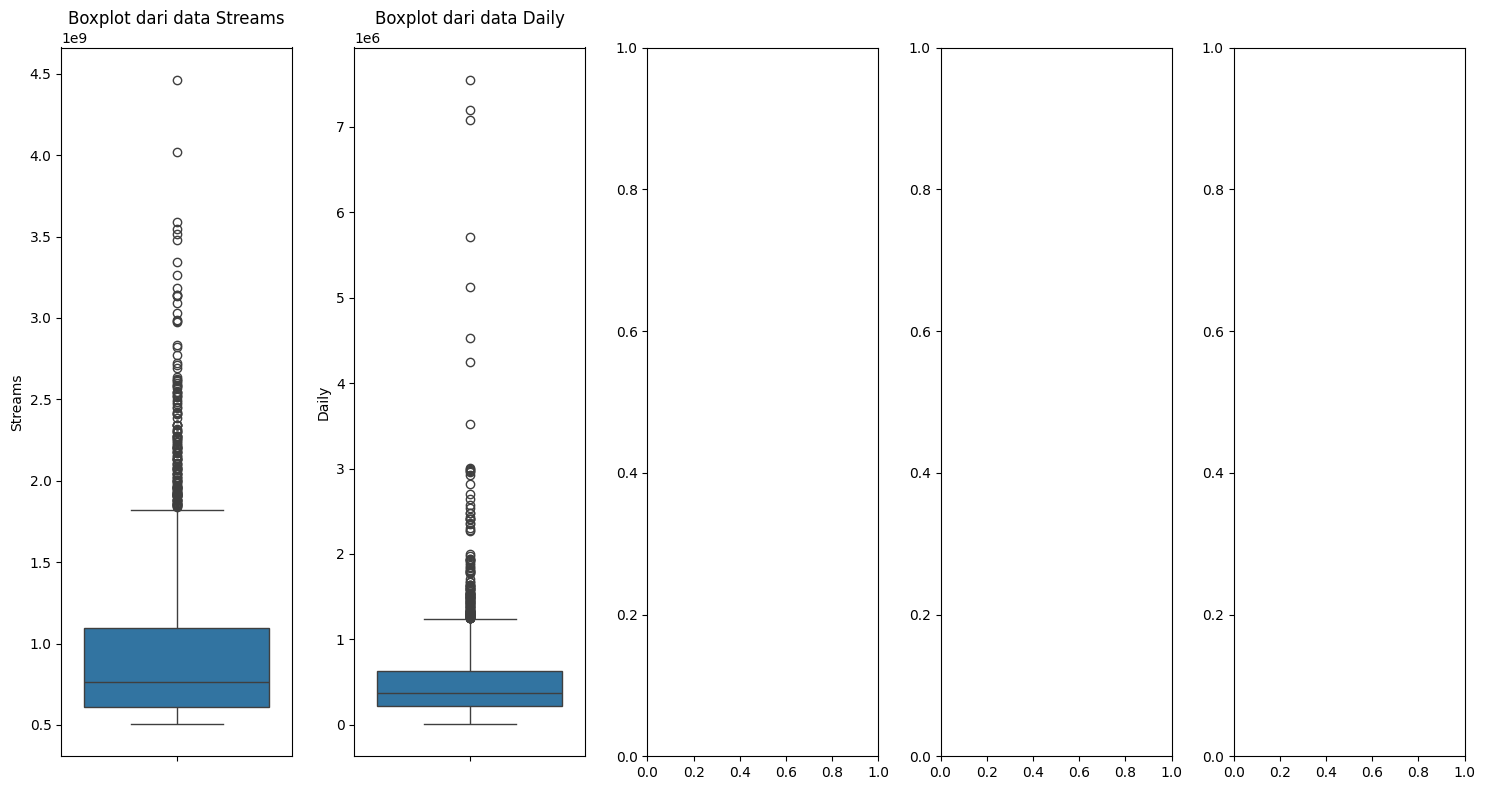

In [22]:
kolom_numerik=[]
for i in kolom:
    if data[i].dtype == 'O':
        continue
    kolom_numerik.append(i)

fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(15,8))

for i,var in enumerate(kolom_numerik):
    sns.boxplot(y=data[var], ax=ax[i])
    ax[i].set_title(f'Boxplot dari data {var}')

plt.tight_layout()
plt.show()

In [36]:
def rentang_korelasi(pearman):
    pearman=pearman[0]
    if 0.9 <= pearman <= 1.0:
        return 'Korelasi Positif Sangat kuat'
    elif -1.0 <= pearman <= -0.9:
        return 'Korelasi Negatif Sangat kuat'
    elif 0.7 <= pearman < 0.9:
        return 'Korelasi Positif kuat'
    elif -0.9 <= pearman < -0.7:
        return 'Korelasi Negatif kuat'
    elif 0.4 <= pearman < 0.7:
        return 'Korelasi Positif sedang'
    elif -0.7 <= pearman < -0.4:
        return 'Korelasi Negatif sedang'
    elif 0.1 <= pearman < 0.4:
        return "Korelasi Positif lemah"
    elif -0.4 <= pearman < -0.1:
        return 'Korelasi Negatif lemah'
    else:
        return 'Tidak ada korelasi'

In [38]:
def safe_pearsonr(x, y):
    """Safely perform Pearson correlation, handling NaNs and infinities."""
    if x.isnull().any() or y.isnull().any():
        return 'Error: Data contains NaN values. Please clean the data.'
    if not np.isfinite(x).all() or not np.isfinite(y).all():
        return 'Error: Data contains infinite values. Please clean the data.'
    
    return pearsonr(x, y)

# Now, using the updated safe_pearsonr function for correlation
hasil1 = safe_pearsonr(data['Streams'], data['Daily'])

# Output result with error handling
if isinstance(hasil1, str):  # If it's an error message
    hasil1
else:
    f"Korelasi dari kolom 'Streams' dan 'Daily' adalah {rentang_korelasi(hasil1)}"

from scipy.stats import pearsonr

# Function to categorize correlation strength
def rentang_korelasi(pearson_result):
    correlation = pearson_result[0]
    if correlation > 0.8:
        return "Sangat kuat"
    elif 0.6 < correlation <= 0.8:
        return "Kuat"
    elif 0.4 < correlation <= 0.6:
        return "Sedang"
    elif 0.2 < correlation <= 0.4:
        return "Lemah"
    else:
        return "Sangat lemah"

# Calculating Pearson correlations for the given columns
hasil1 = pearsonr(x=data['Streams'], y=data['Daily'])

# Display the results
hasil1_korelasi = rentang_korelasi(hasil1)
hasil1_korelasi



ValueError: array must not contain infs or NaNs

In [35]:
# Remove rows with NaN or infinite values in 'Streams' and 'Daily' columns
spotify_data_clean = data[['Streams', 'Daily']].dropna()
spotify_data_clean = spotify_data_clean[spotify_data_clean.applymap(np.isfinite).all(1)]

# Recalculating Pearson correlation after cleaning the data
hasil1_clean = pearsonr(x=spotify_data_clean['Streams'], y=spotify_data_clean['Daily'])

# Classify the correlation strength
hasil1_clean_korelasi = rentang_korelasi(hasil1_clean)

# Display the results
hasil1_clean_korelasi, hasil1_clean


C:\Users\LINA\AppData\Local\Temp\ipykernel_2092\2743226112.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  spotify_data_clean = spotify_data_clean[spotify_data_clean.applymap(np.isfinite).all(1)]


('Sedang',
 PearsonRResult(statistic=0.4432068612642739, pvalue=1.0567915180110365e-120))